# Clinical Informatics 2023
##        Service Brief

## Year in review
- Staffing of CAC, workload
- State Veteran Home at Yountville
- New VERA program for NorCal.
 

In [51]:
import matplotlib.pyplot as plt 
import pandas as pd
class Service2023:
    '''
    A set of methods to create a notebook for slides of state of the service.
    
    '''

    def load_cac(self):
        '''
        A method to load the CAC data 
        '''
        self.data = pd.read_csv('../assets/CACdata_2023.csv')
        self.data['DateInitiated'] = self.data["Date Initiated"].apply(lambda x: pd.Timestamp(x))
        self.data['DateResolved'] = self.data["Date Resolved"].apply(lambda x: pd.Timestamp(x))

    def agg_cac(self, start= '2023-01-01'):
        '''
        Aggregate data for the CAC perfomance
        '''
        data = self.data[self.data.DateInitiated >=start]
        
        return data[['UID','DateInitiated']].groupby('DateInitiated').count()

    def plot_cac(self):
        '''
        A method to  plot CAC work load related data
        '''
        
        data = self.agg_cac()
        #q25,q50,q75 = data.quantile([0.25,0.5,0.75]).array()
        fig,(ax0,ax1) = plt.subplots(2,1, figsize = (12,10))
        ax0.set_title('freq CAC req data.quantile([0.25,0.5,0.75]).array()')
        ax0.set_ylabel('daily count')
        #data.plot(ax = ax0, grid = True)
        ax0.stem(data.index, data,'b',markerfmt=" ", basefmt="-b")
        ax0.set_label('count')
        ax0.legend()
        data.boxplot('UID', grid = True, ax = ax1)
        ax1.set_title('Dist. of daily  requests')

        plt.show()
        


s = Service2023()

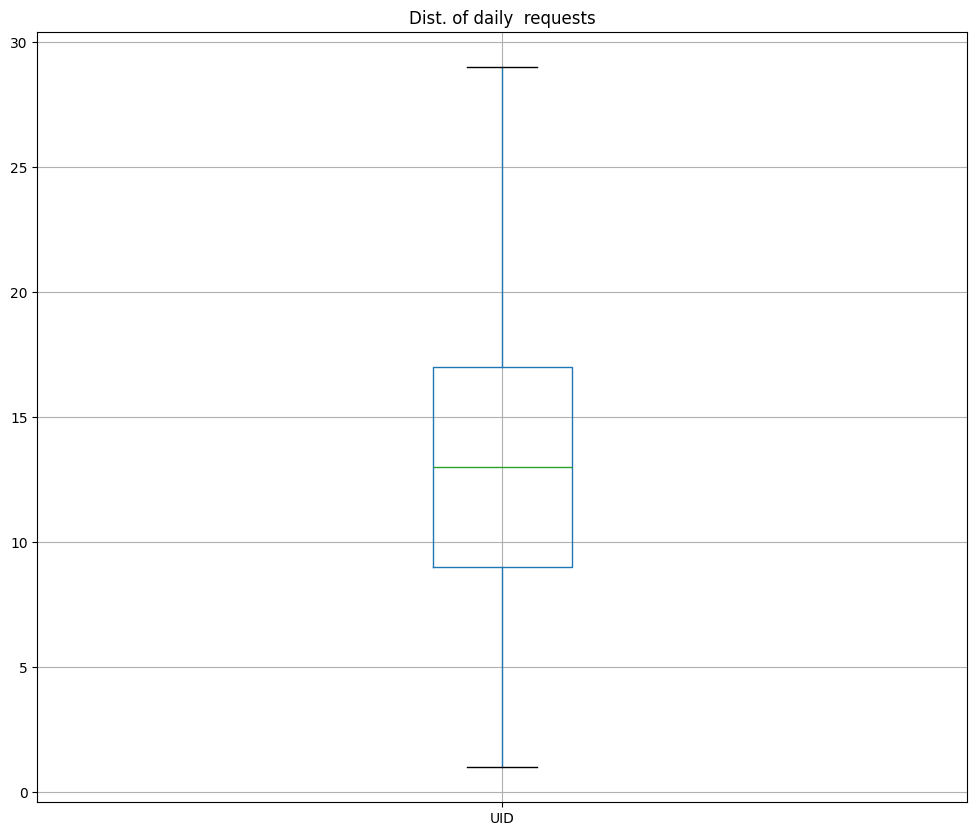

UID    3475
dtype: int64

In [78]:
s.load_cac()
data = s.agg_cac()
fig, ax1 = plt.subplots(1,1, figsize = (12,10))
data.boxplot('UID', grid = True, ax = ax1)
ax1.set_title('Dist. of daily  requests')
plt.savefig('../figs/DailyCACrequests.jpeg')
plt.show()
data.sum()



## Yountville State Veteran Home
- Integration of 500 Veterans into NorCal.
- Setting up for Telehealths services at the home.
- 

## New VERA program for NorCal
- Ms Deb Rotteck Join NorCal HCS 2/28/23
  Set up a VERA program for NorCal to include:
  
    - Mulitple educational presentations.
    - Setting up multiple audits to identify opportunity to VERA optimization
    - Suggest operational solution supporting VERA optimization
    - Integration with VISN, HIM, BDMS
    - Faculty on ILEAD Clinical Services Leadership Institute Neurology Conference in Washington DC.

  

## VERA Training
- Pharmacy
- Social Work
-  Primary Care
-  Hem/Onc
-  Ophtahlmology
-  Physiatry
-  Gastroenterology
-  GEC
-  Medical Dental - January 2024
-  ADPCS Chief Nurse/APRN - June 2024

## Achievents for the period since arrival
- Setup the innaugural VERA committee for NorCal.
- 33 audits for V21 Data Validation Committee
- 25 audits completed for NCHCS Data Validation Committee
- NON-PACT project identified ~500 Veterans that if seen for their service connected condition could potentially yield $2.5M, VS. regular PACT assignment
- CIH project


##  Home Based Care (HBC)
- Audit in August 2023:
    - 141 patient were **under-classified**
    - 33 patients were 1-3 visits from meeting criteria.
    - Cliincal judgment permitting 8/33 patients were moved to price group 8 resulting in 256,379$ in future VERA dollar allocation ( M11 numbers)


## Future Direction
- VERA internship, for Veterans as part of the Debt Relief Program.
- VERA sharepoint including Booking and Q&A section.
- Introdcue VERA at the New Employee Orientation (NEO).
- Monthly news letter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class TH:
    '''
    A set of methods to prodcue visualizations for TH
    '''

    def load(self,fname):
        '''
        A method to load data
        fname -  string, the csv for the file
        '''
        self.data = pd.read_excel('../assets/'+fname)
        self.data['Month'] = self.data.Created.apply(lambda x: pd.Timestamp(x).month)

    def barh_graph(self, object, fname):
        '''
        A method to return a bar graph of counts
        '''
        fig, ax = plt.subplots(1,1, figsize = (14,8))
        object.plot(kind = 'barh', fontsize = 6, ax = ax)
        ax.set_xlabel('count')
        plt.savefig('../figs/'+fname)
        plt.show

th = TH()

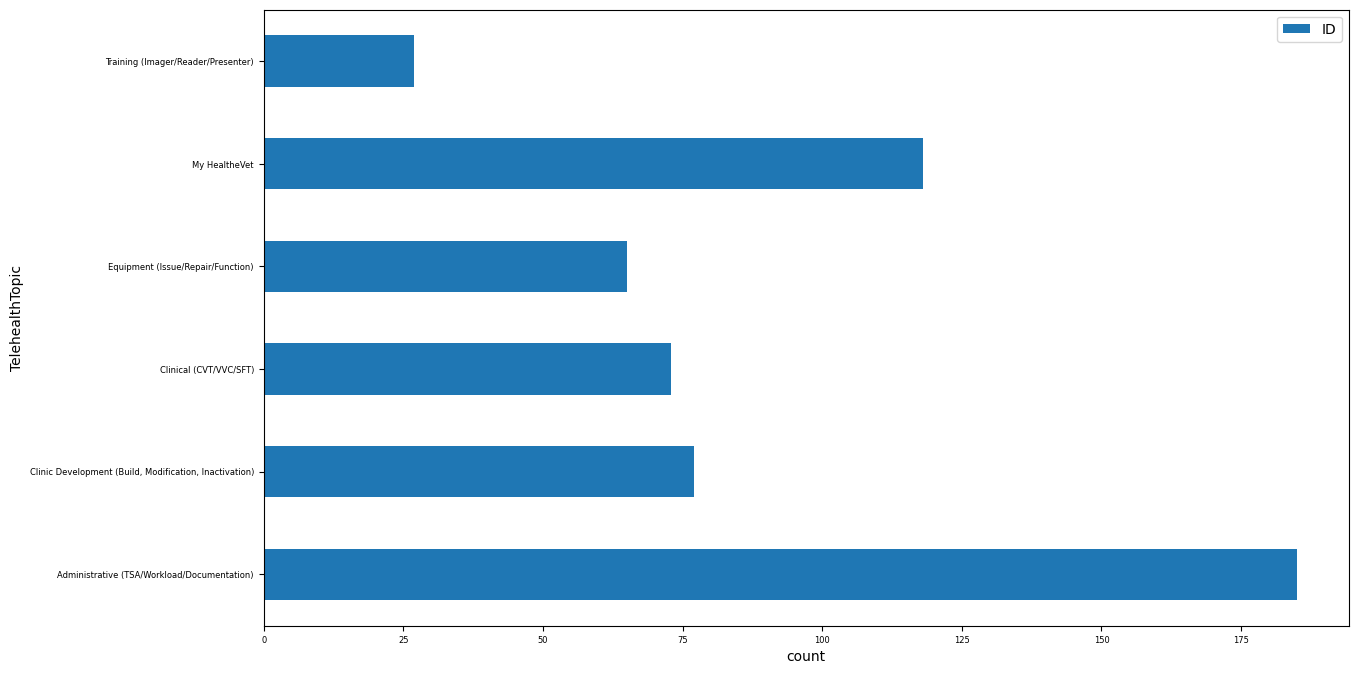

In [24]:
# 
th.load('requests.xlsx')
object = th.data[['ID','TelehealthTopic']].groupby('TelehealthTopic').count()
th.barh_graph(object,'TopicRequest.jpeg')
plt.show()

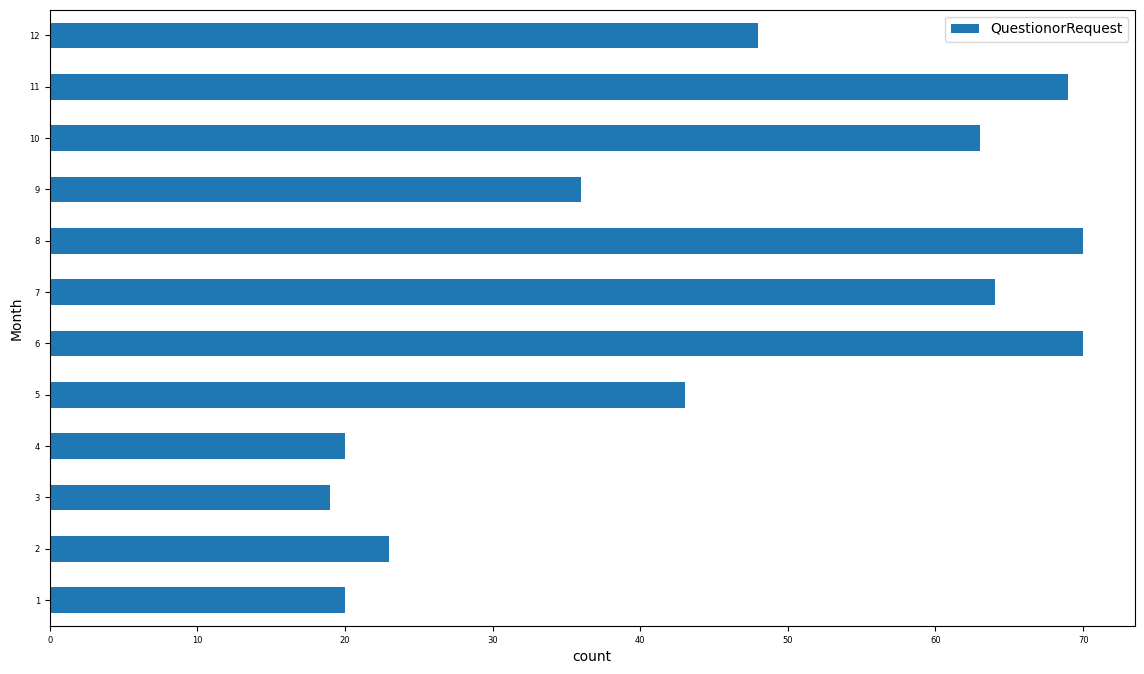

In [25]:
object = th.data[['QuestionorRequest','Month']].groupby('Month').count()
th.barh_graph(object,"MonthlyQuestionsRequests,jpeg")

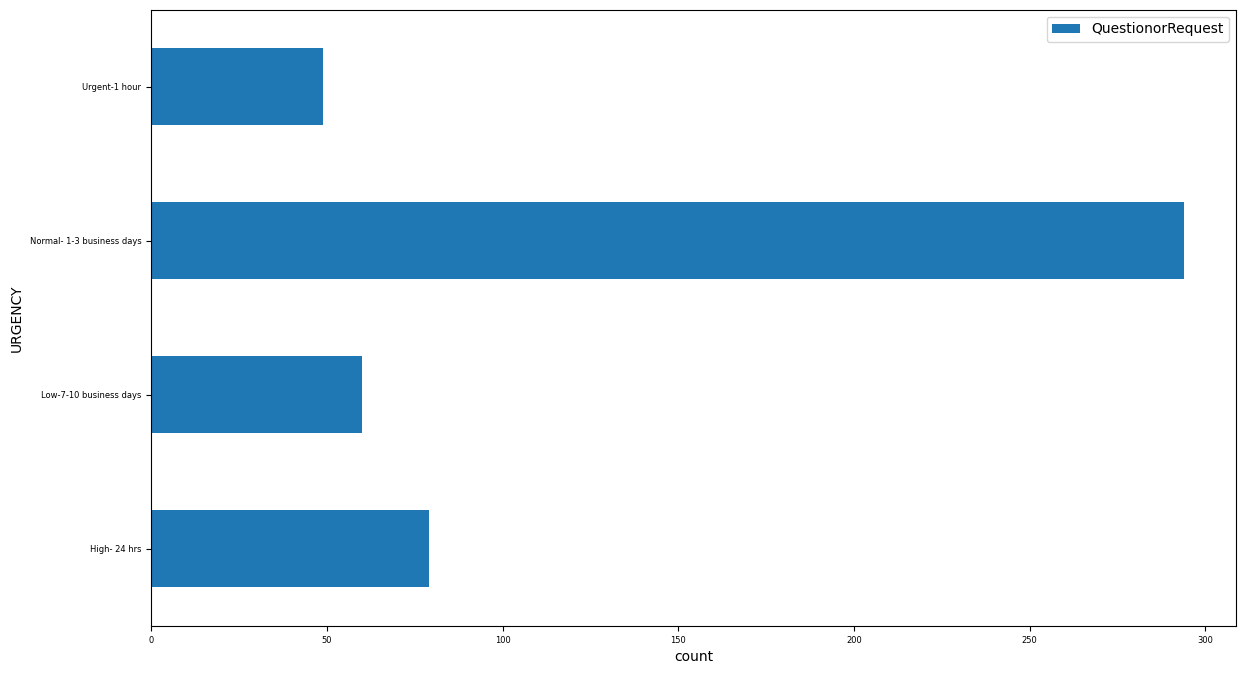

In [27]:
object = th.data[['QuestionorRequest','URGENCY']].groupby('URGENCY').count()
th.barh_graph(object,"RequestUrgency.jpeg")

In [34]:
object = th.data[['STATUS','Month']].groupby(['Month','STATUS']).value_counts()
print('Sum of all requests:',object.sum())


Sum of all requests: 545


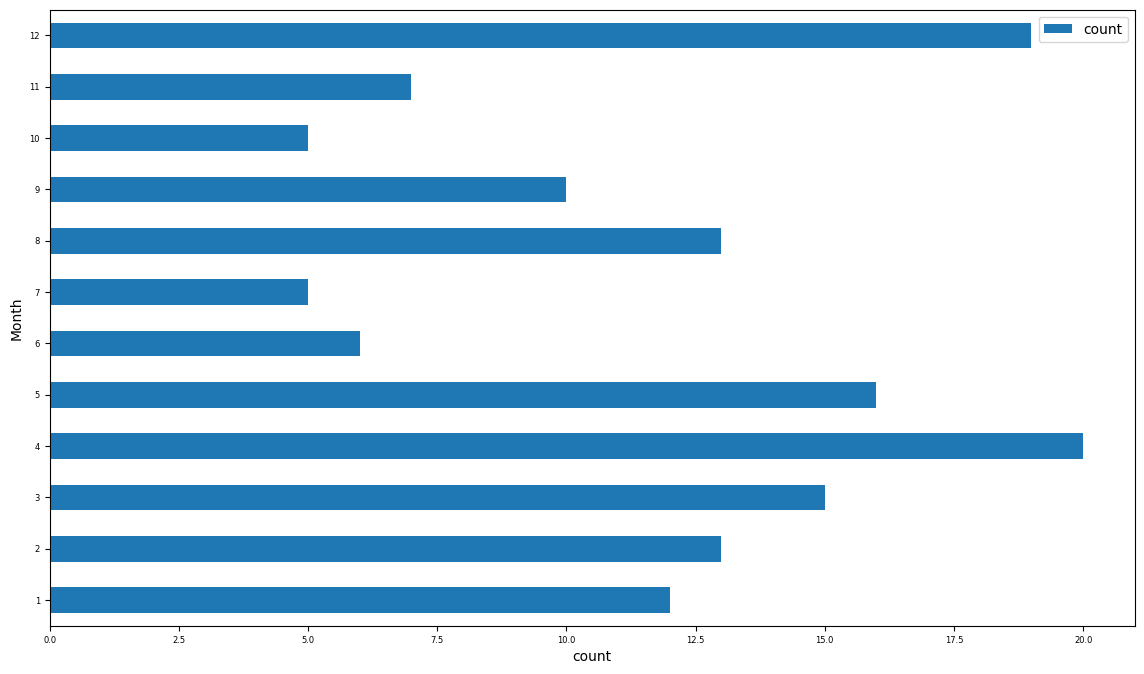

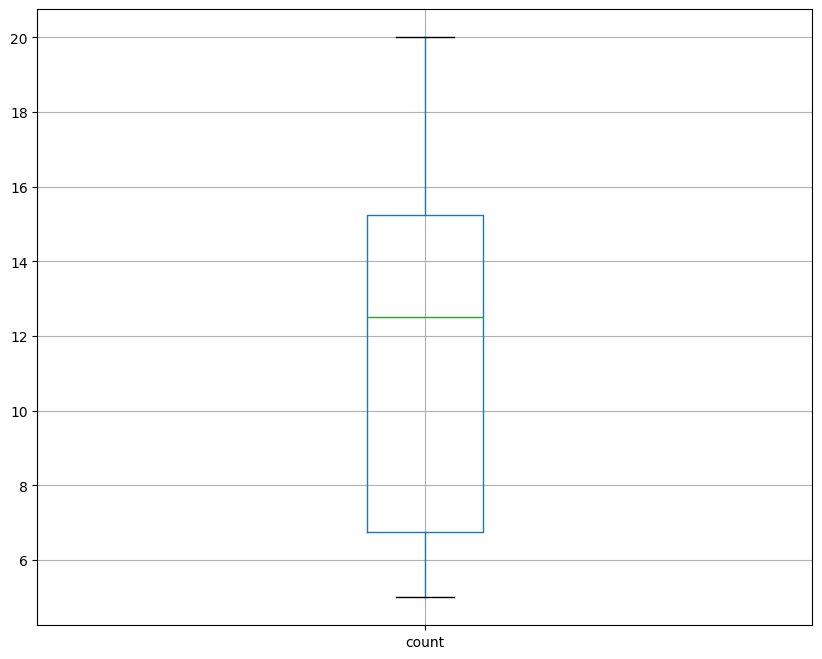

In [6]:
# Student training
th.load('StaffTraining.xlsx')

# th.data['Student Status'].value_counts() # counts of student per category.
object = th.data[['Month']].value_counts().\
  reset_index().sort_values(by = 'Month').\
  set_index('Month')
  #training per month, instead of total count
th.barh_graph(object,"MonthlyTrainingCount.jpeg")
plt.show()
#
# Box plot 
fig,ax  = plt.subplots(1, figsize = (10,8))
ax.grid('on')
th.data[['Month']].value_counts().reset_index().\
        sort_values(by = 'Month').set_index('Month').boxplot(ax = ax)
plt.savefig('DistribMonthTrainig.jpeg' )
plt.show()

In [13]:
print('Total number of training:',object['count'].sum())


Total number of training: 141


In [21]:
print('Median and IQR for training:\n',object['count'].quantile([0.25,0.5,0.75]))

Median and IQR for training:
 0.25     6.75
0.50    12.50
0.75    15.25
Name: count, dtype: float64


Total # of requests: 110


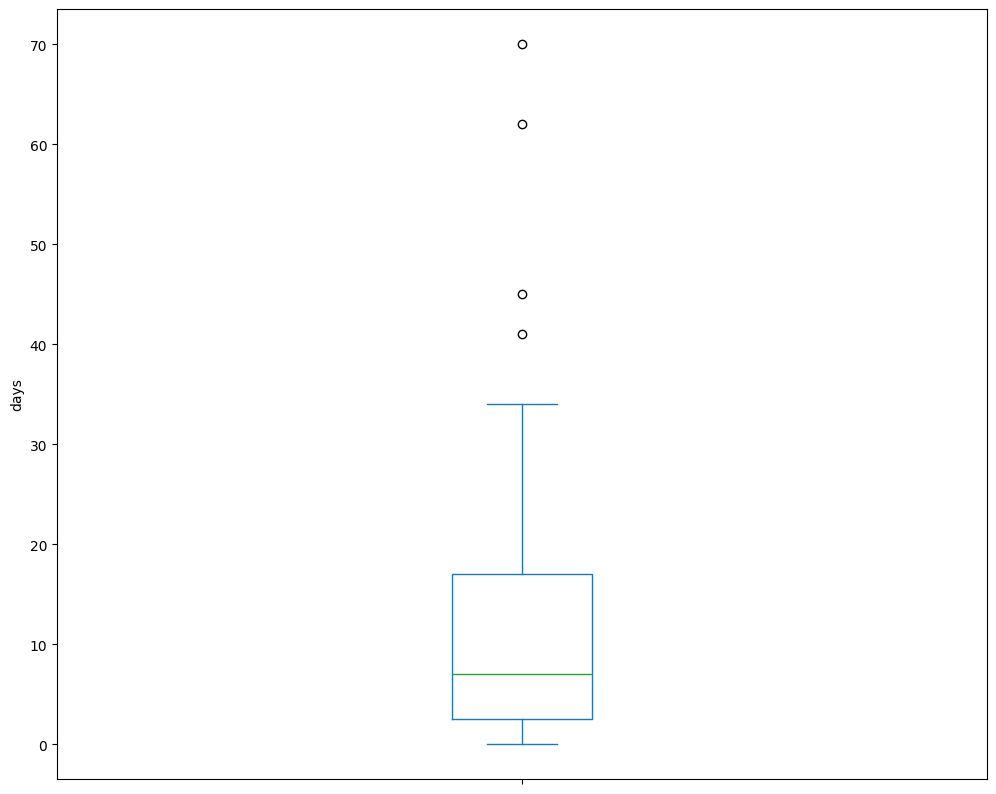

In [5]:
# Equipment
# timeliness of response
th.load('THEquipment.xlsx')
print('Total # of requests:', th.data.shape[0])
th.data['DateCreated'] = th.data.Created.apply(lambda x: x.date())
th.data['DateCompleted'] = th.data['Date Install Completed'].apply(lambda x: x.date())
days = -(th.data['DateCreated'] - th.data['DateCompleted'])
days.dropna(inplace=True)
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax.set_ylabel('days')
days.apply(lambda x: x.days).plot.box(ax = ax)
plt.savefig('../figs/Time2Equipment.jpeg')
plt.show()


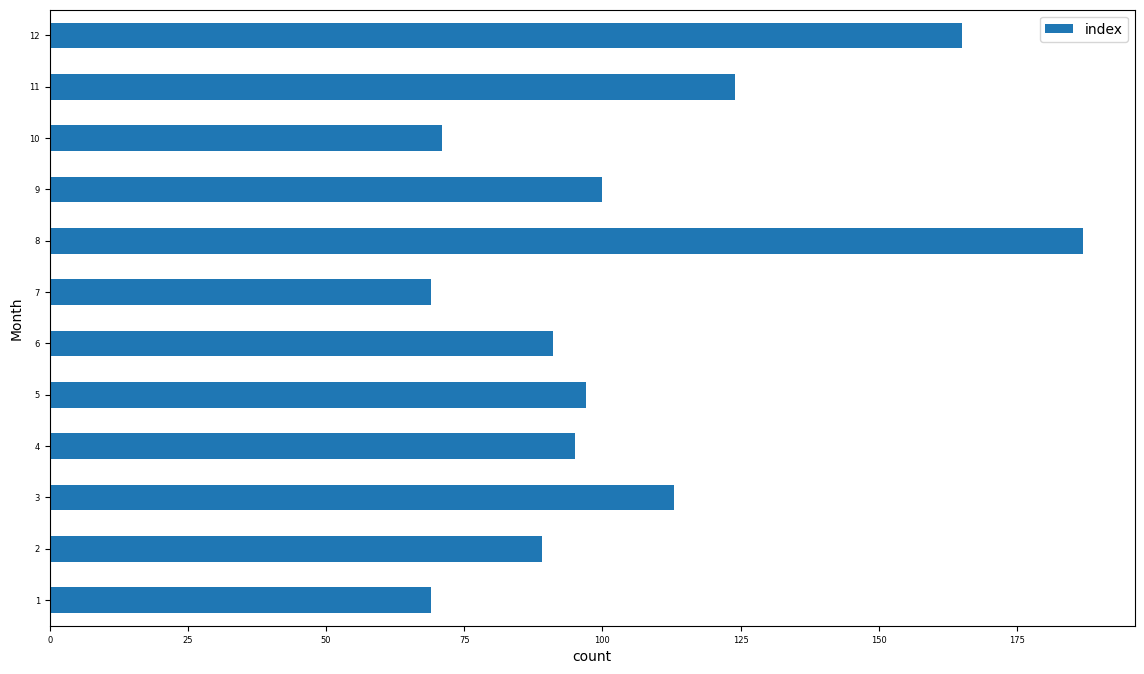

In [35]:
#MHV Staff Add modification request
th.load('MHVStaffAddModificationRequest.xlsx')
object = th.data.Month.reset_index().groupby('Month').count()
th.barh_graph(object,'MHV_Staff_Add_Request.jpeg')
plt.show()

In [39]:
print('Total number of:', object.sum())

Total number of: index    1270
dtype: int64


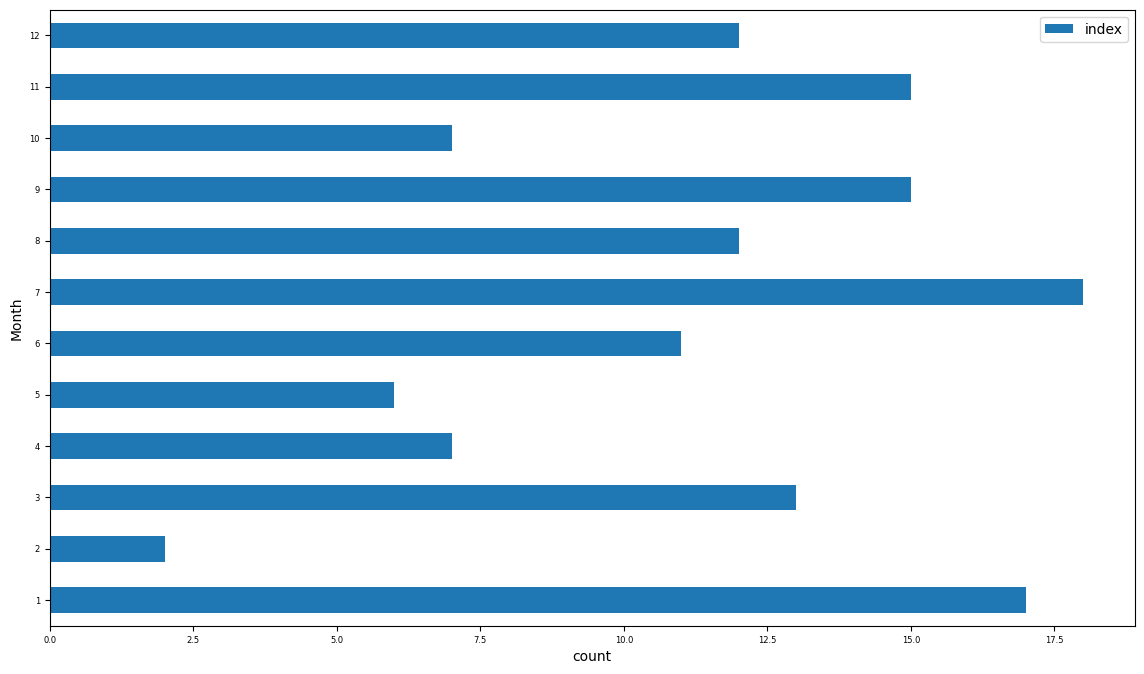

In [42]:
# MHV triage Team New Remove requests
th.load('MHV_TRIAGE_TEAM_NEW_REMOVE_REQUESTS .xlsx')
th.data['Month'] = th.data.Created.apply(lambda x: x.date().month)
object = th.data['Month'].reset_index().groupby('Month').count()
th.barh_graph(object,'MonthlyTriageTeamRemoveReqs.jpeg')

In [45]:
print('Total triage team new requests:',object.sum())


Total triage team new requests: index    135
dtype: int64


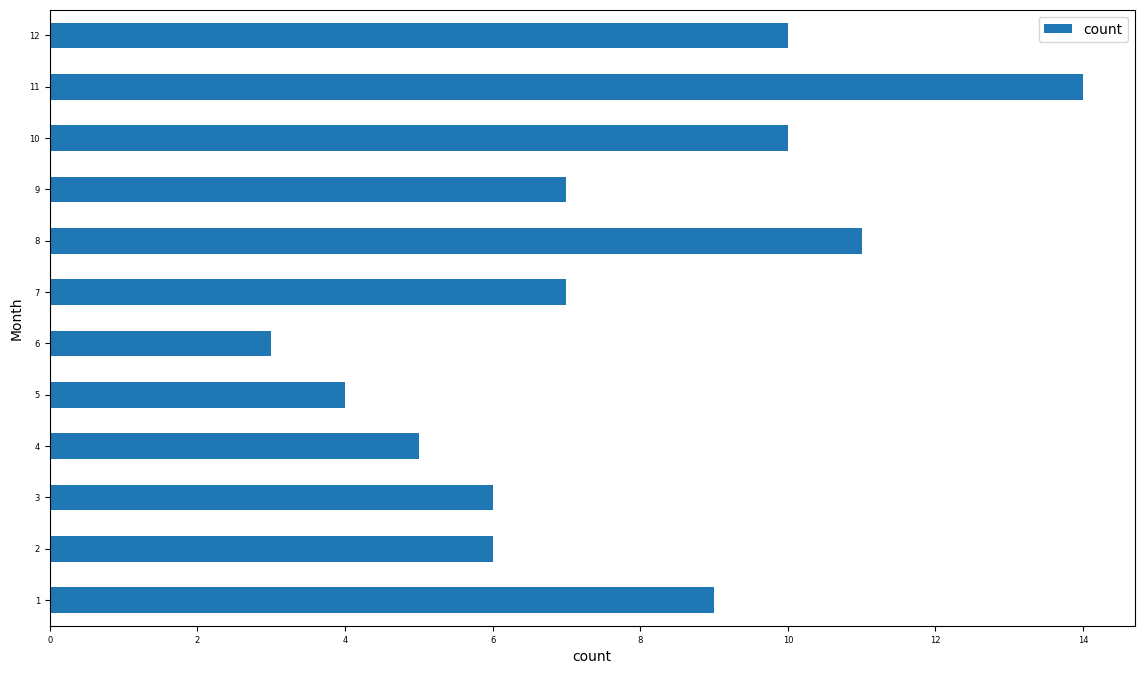

In [46]:
# MHV
th.load('MHVAddRemovePatientRequests .xlsx')
th.data['Month'] = th.data.Created.apply(lambda x: x.date().month)
object = th.data['Month'].value_counts().reset_index().sort_values('Month').set_index('Month')
th.barh_graph(object,"AddRemovePatient.jpeg")